In [30]:
import pandas as pd
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from typing import List
import re
import os

%matplotlib notebook

In [76]:
def file_to_pd_1(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df

## In our program we have computed correlations for j>=i because correlation function is symmetric with respect to j <-> i

The function below gets all correlation values

In [79]:
# get all corr values
def get_all_correlations(data, site_num):
    d = data[(data.n2 == site_num)&(data.n2!=data.n1)].copy()
    d['add'] = d['n1']
    d['n1'] = d['n2']
    d['n2'] = d['add']
    d.drop('add', axis = 1, inplace = True)
    return pd.concat([data[data.n1 == site_num],
                      d], axis = 0).sort_values(by = 'n2')

In [81]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values

# W = 1 (Burovski/Orso), L = 80, tdown = 0.3/ tdown = 1

In [77]:
df_equal = file_to_pd_1('W1_03_superconductive_L_12_24.txt')
df_unequal = file_to_pd_1('W1_03_superconductive_L_17_29.txt')
df_equal_1 = file_to_pd_1('W1_1_superconductive_L_12_24.txt')

In [78]:
W, L = 1, 80
ctr = W * (L//2) - W//2

In [80]:
ctr

40

In [82]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


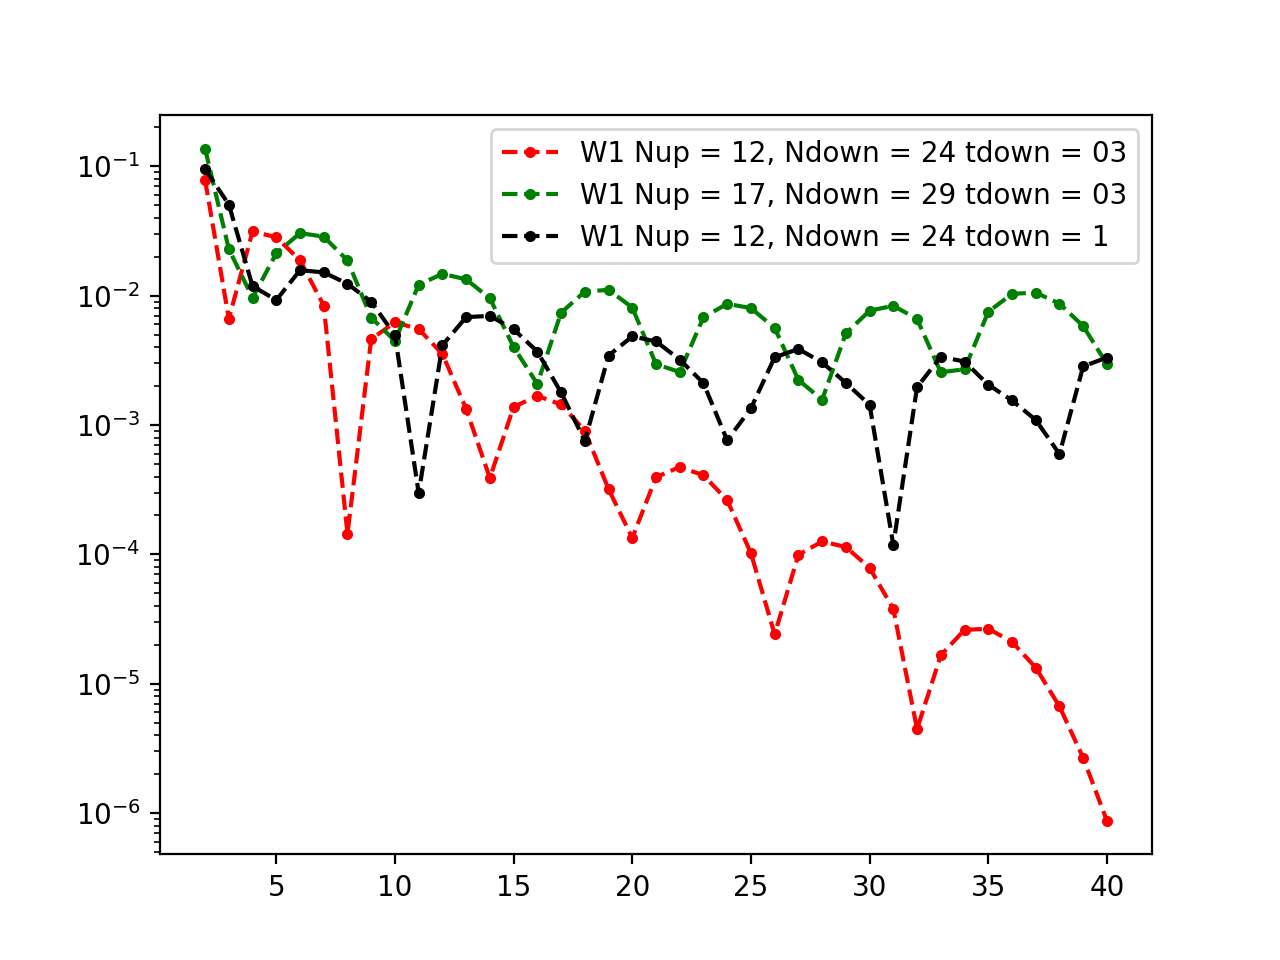

In [83]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W1 Nup = 12, Ndown = 24 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label ='W1 Nup = 17, Ndown = 29 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W1 Nup = 12, Ndown = 24 tdown = 1', c = 'black')
         
plt.legend()

The picture is just the same is in the prev.article.

Outcome: Presence of trimers ruins the algebraic order of correlations

# W = 2, L = 80, tdown = 0.3 / tdown = 1


Correlations are measured along one of the legs (as they are completely equivalent)

In [84]:
def file_to_pd_2(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df

In [85]:
df_unequal = file_to_pd_2('W2_0.30000012_20_correlations.txt')
df_equal = file_to_pd_2('W2_0.30000010_20_correlations.txt')
df_equal_1 = file_to_pd_2('W2_1.00000010_20_correlations.txt')

In [86]:
W, L = 2, 80
ctr = W * (L//2) - W//2

In [88]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


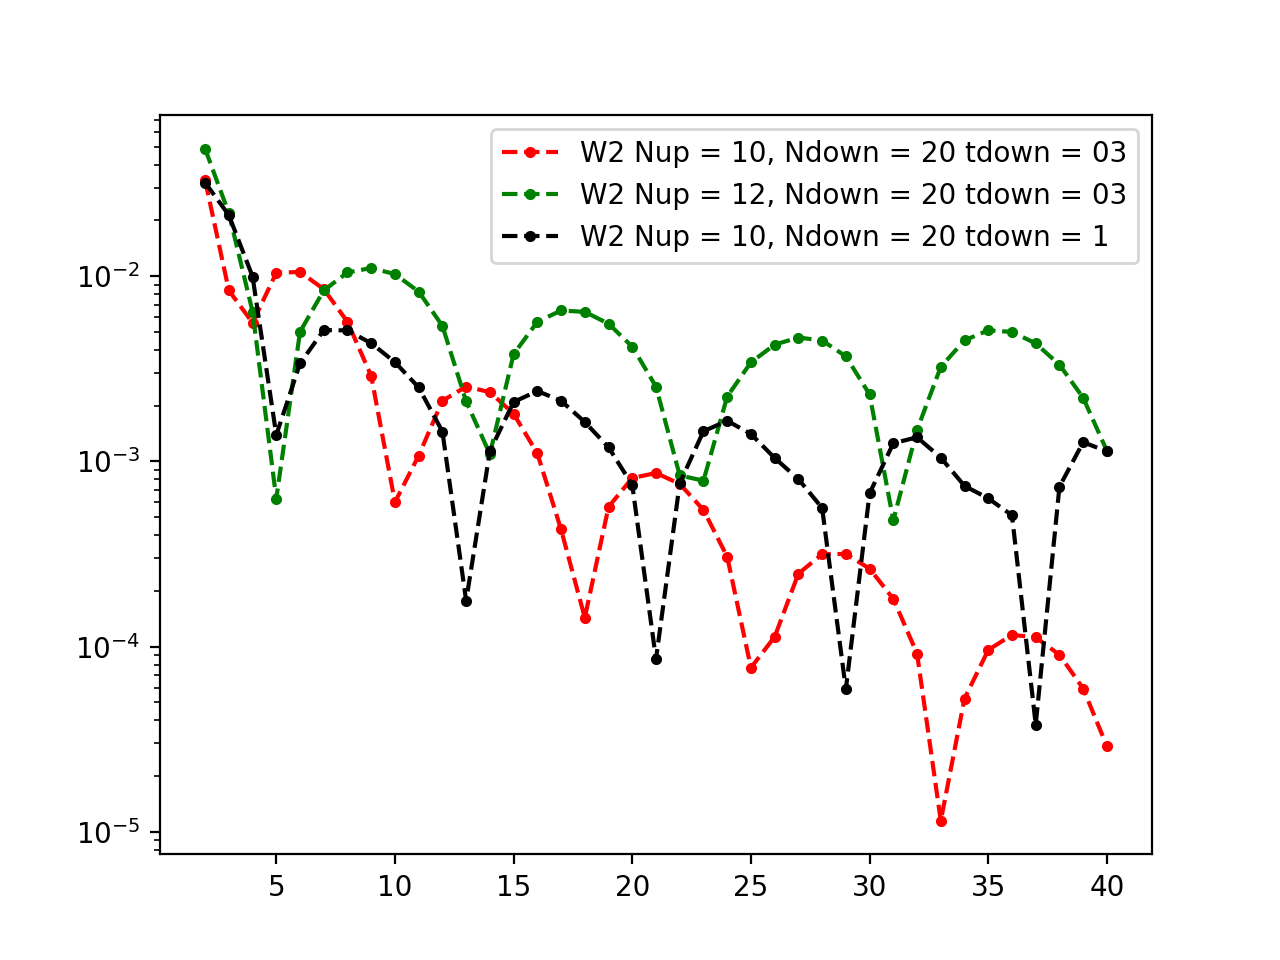

In [90]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W2 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W2 Nup = 12, Ndown = 20 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W2 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
         
plt.legend()

results for W=2 are also consistent with what we saw for W=1:

**Outcome: Presence of trimers ruins the algebraic order of correlations**

# W = 3, L = 80, tdown = 0.3 / tdown = 1

Correlations are measured along one the central leg 

In [94]:
df_unequal = file_to_pd_2('W3_0.30000012_20_correlations.txt')
df_equal = file_to_pd_2('W3_0.30000010_20_correlations.txt')
df_equal_1 = file_to_pd_2('W3_1.00000010_20_correlations.txt')

In [95]:
W, L = 3, 80
ctr = W * (L//2) - W//2

In [96]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


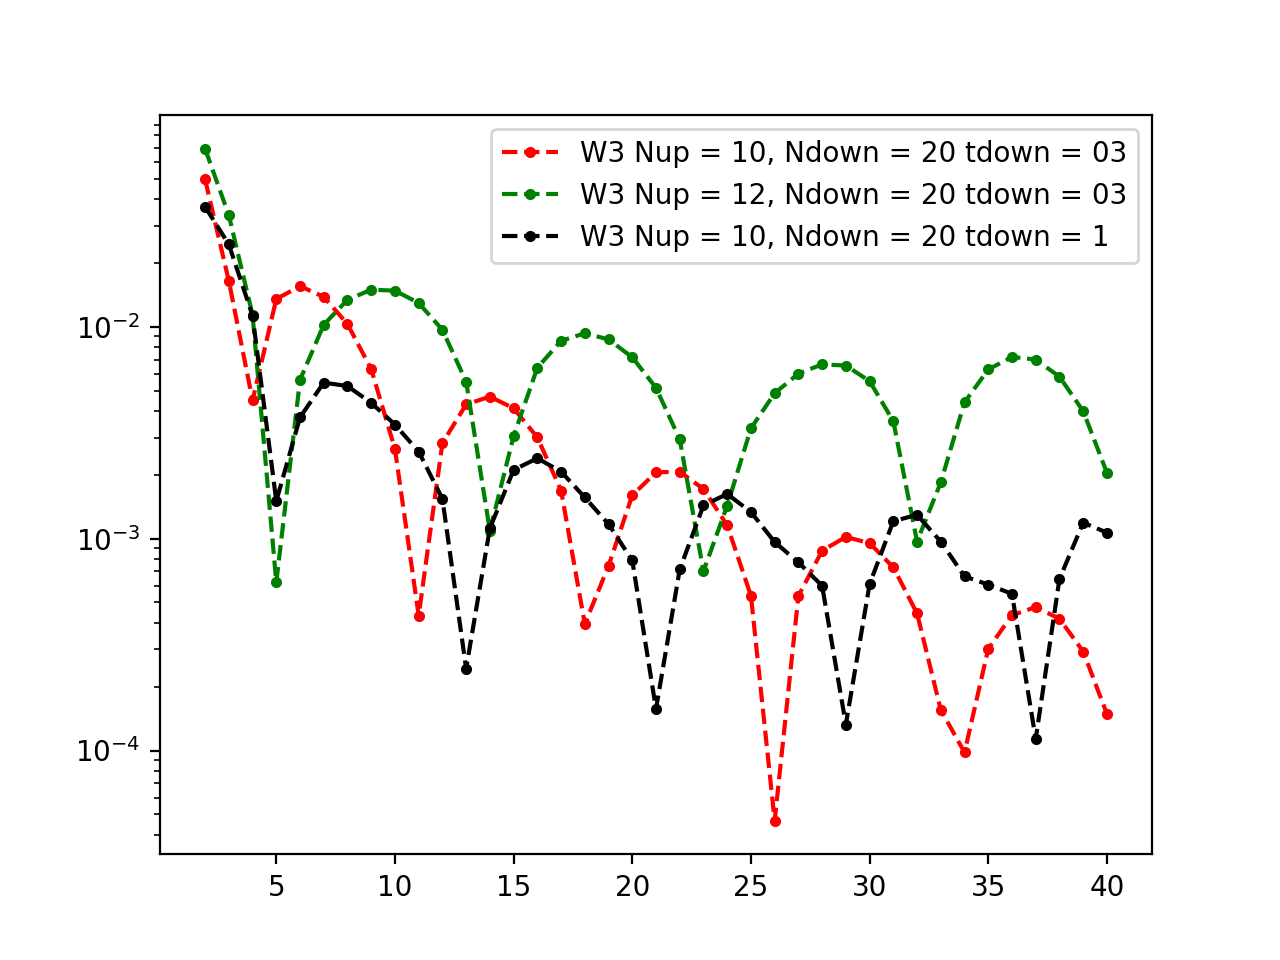

In [97]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W3 Nup = 12, Ndown = 20 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W3 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
         
plt.legend()

results for W=3 are slightly inconsistent with what we saw for W=1:

**Outcome1: commensurate densities for trimer-present configuration still ruins the algebraic order of correlations**

<IPython.core.display.Javascript object>


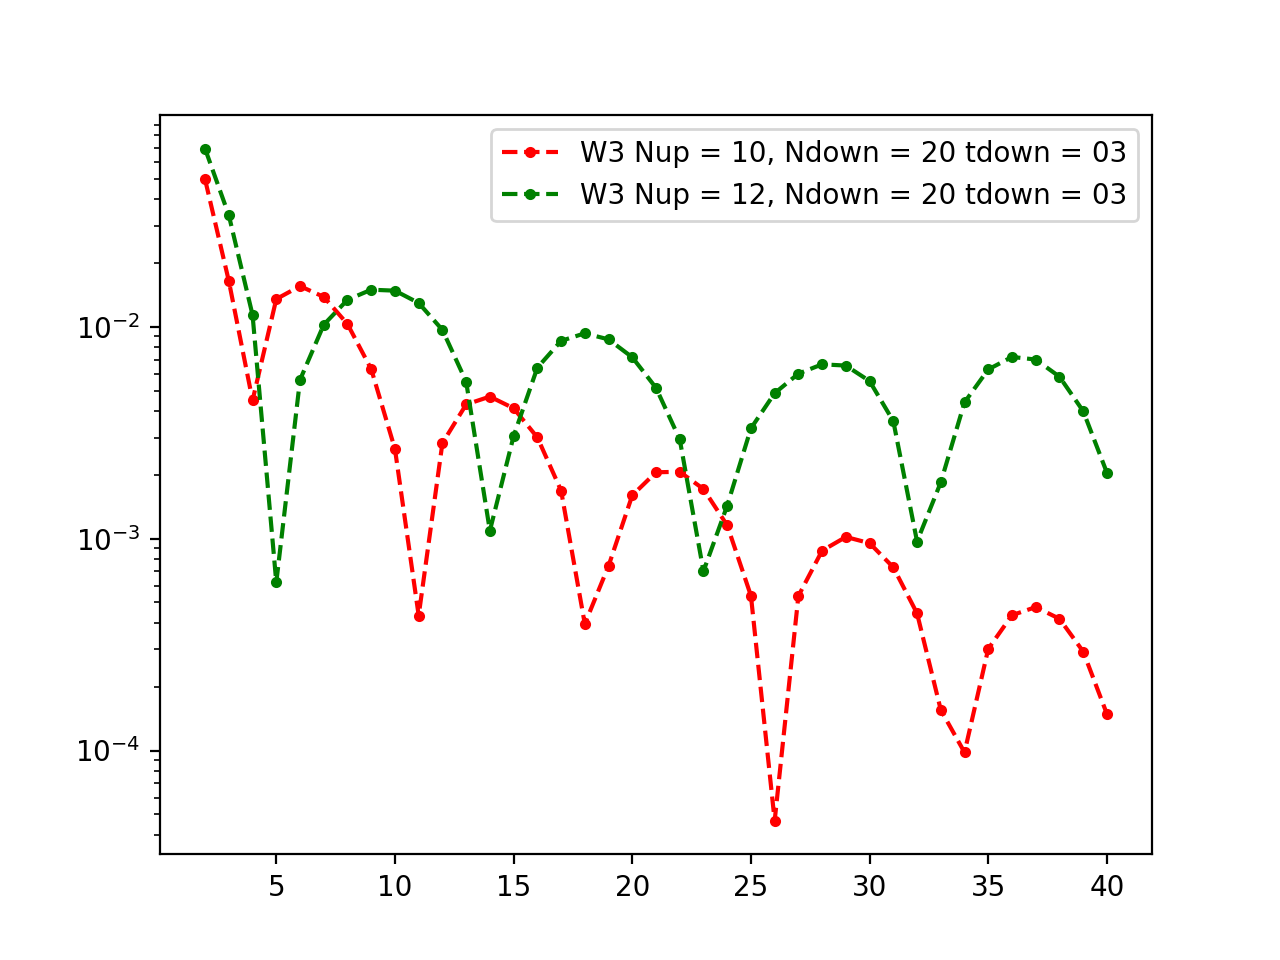

In [101]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W3 Nup = 12, Ndown = 20 tdown = 03', c = 'green')
         
plt.legend()

<IPython.core.display.Javascript object>


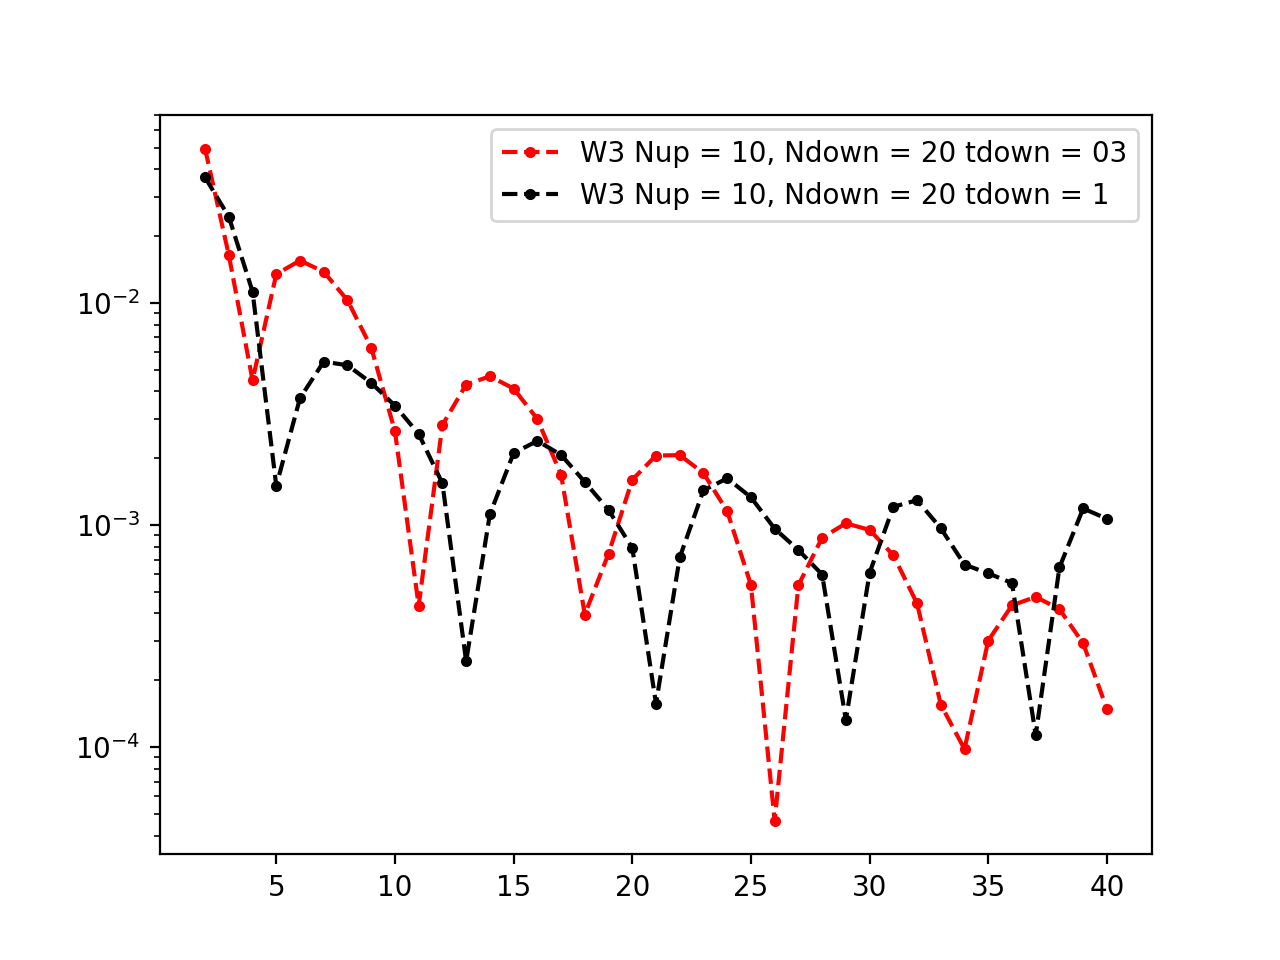

In [100]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W3 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
         
plt.legend()

**Outcome2: Presence of trimers ruins the algebraic order of correlations much less significantly, but one can see that the order is still exponential by position of maxima on the red line**

We can also check these "conclusions" for other values of Nup/Ndown:

In [102]:
df_unequal = file_to_pd_2('W3_0.3000007_17_correlations.txt')
df_equal = file_to_pd_2('W3_0.3000008_16_correlations.txt')
df_equal_1 = file_to_pd_2('W3_1.0000008_16_correlations.txt')

In [104]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


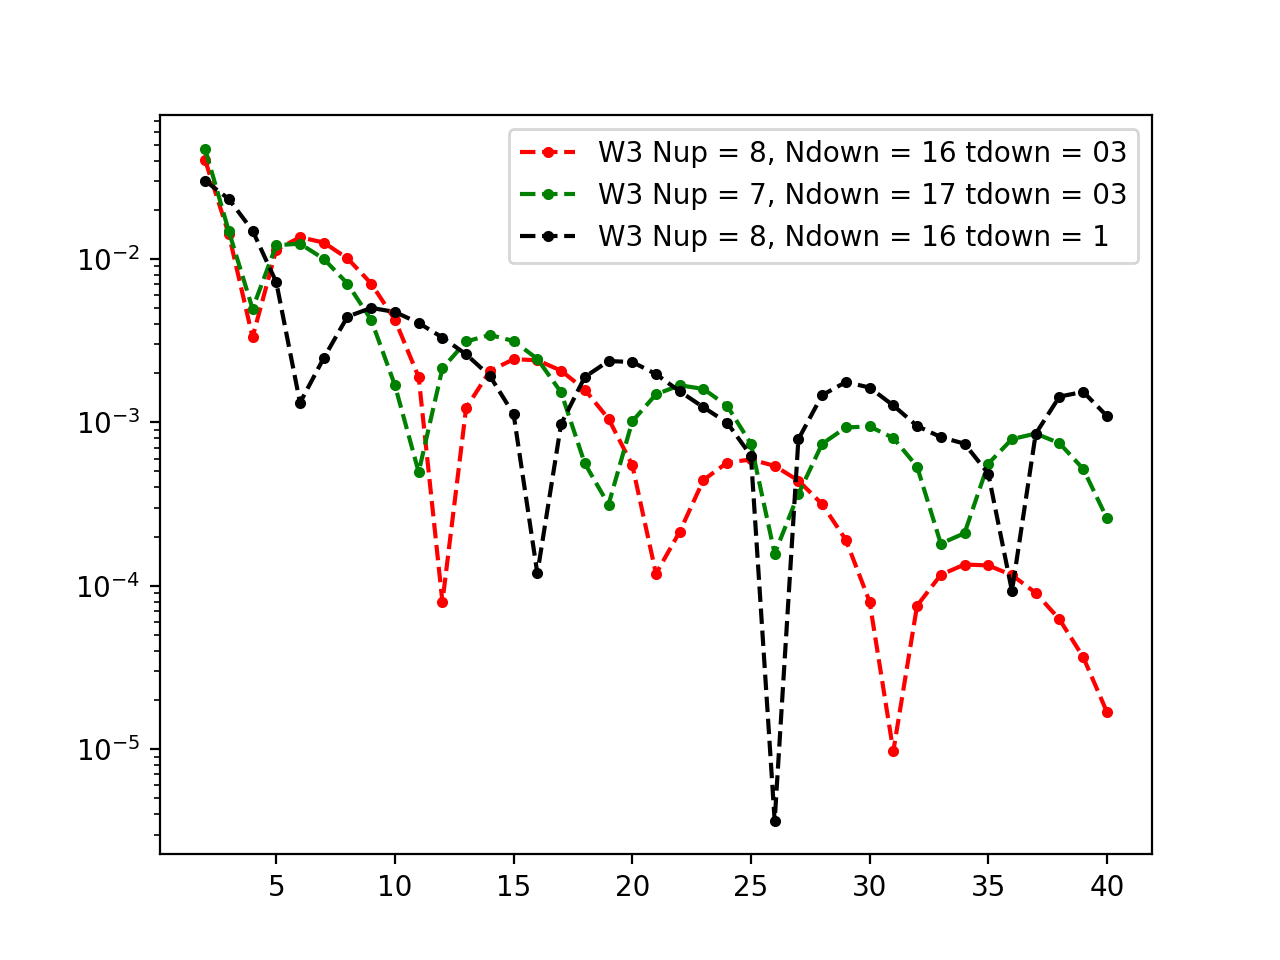

In [105]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W3 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W3 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
         
plt.legend()

<IPython.core.display.Javascript object>


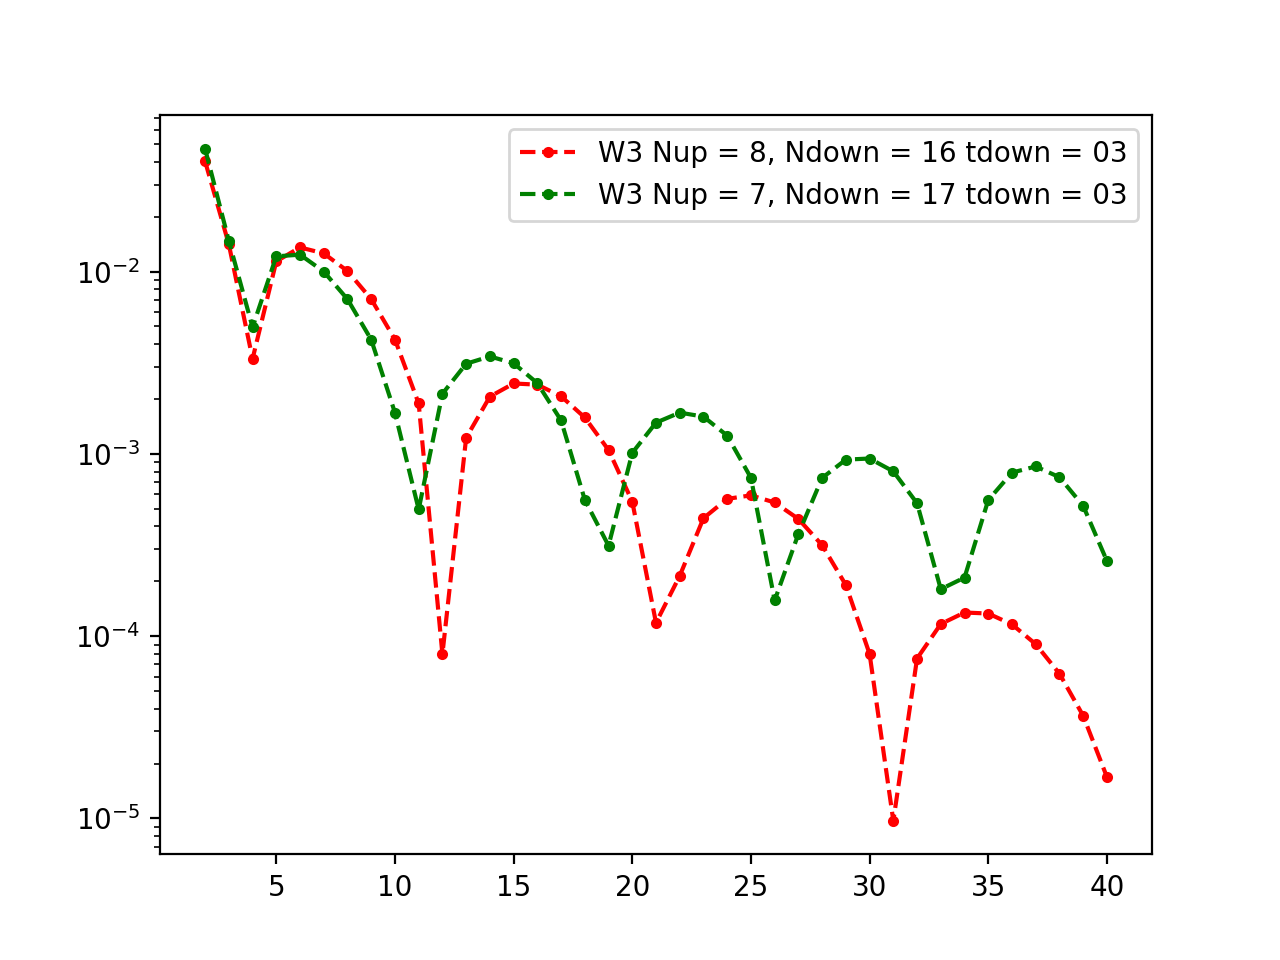

In [106]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W3 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
         
plt.legend()

<IPython.core.display.Javascript object>


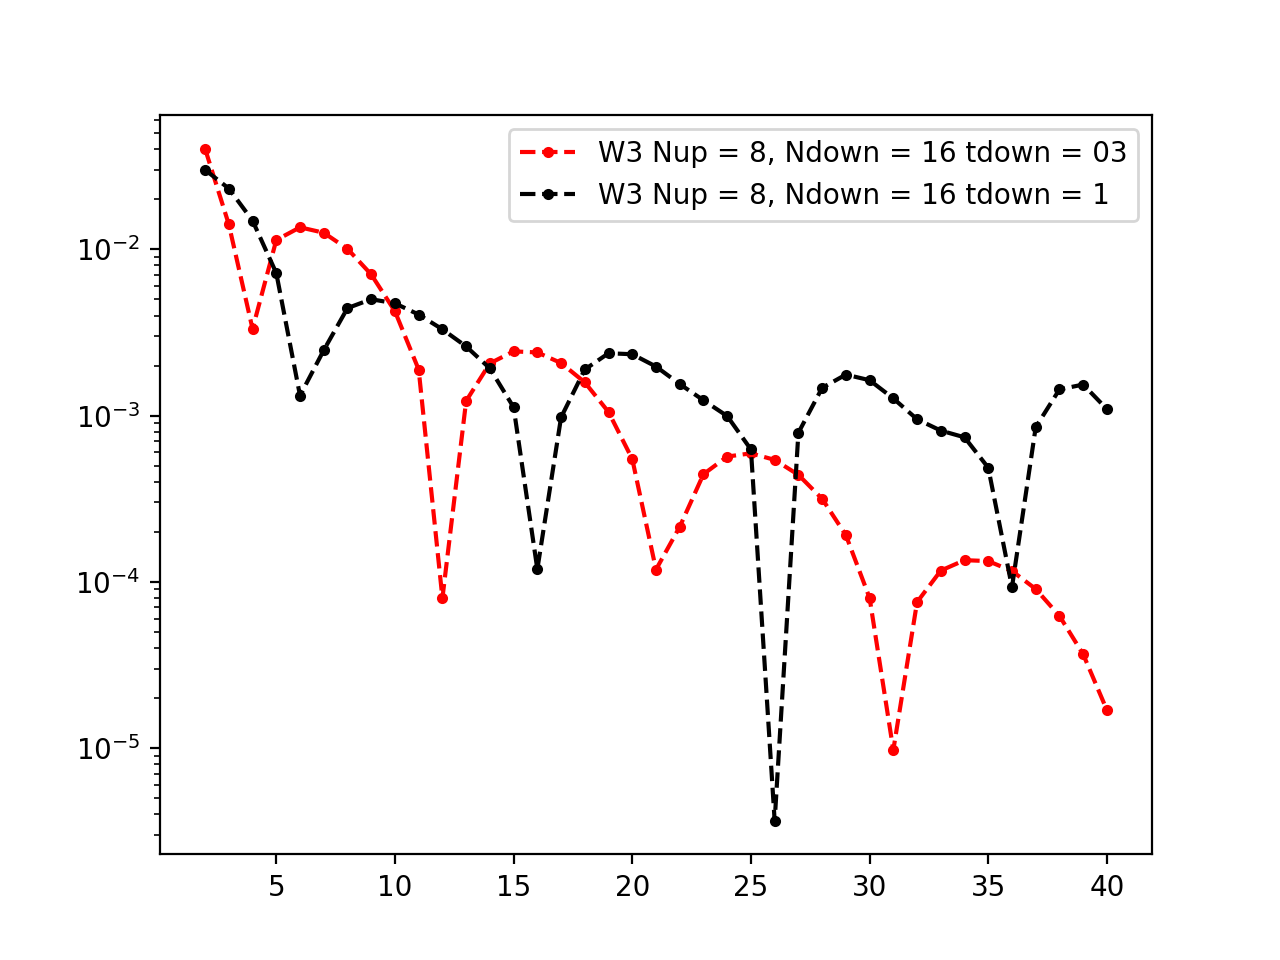

In [107]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W3 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W3 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
         
plt.legend()

# W = 4, L = 80, tdown = 0.3 / tdown = 1

Correlations are measured along one of the central legs (as they are equivalent) 

In [114]:
df_unequal = file_to_pd_2('W4_0.3000007_17_correlations.txt')
df_equal = file_to_pd_2('W4_0.3000008_16_correlations.txt')
df_equal_1 = file_to_pd_2('W4_1.0000008_16_correlations.txt')

In [115]:
W, L = 4, 80
ctr = W * (L//2) - W//2

In [116]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


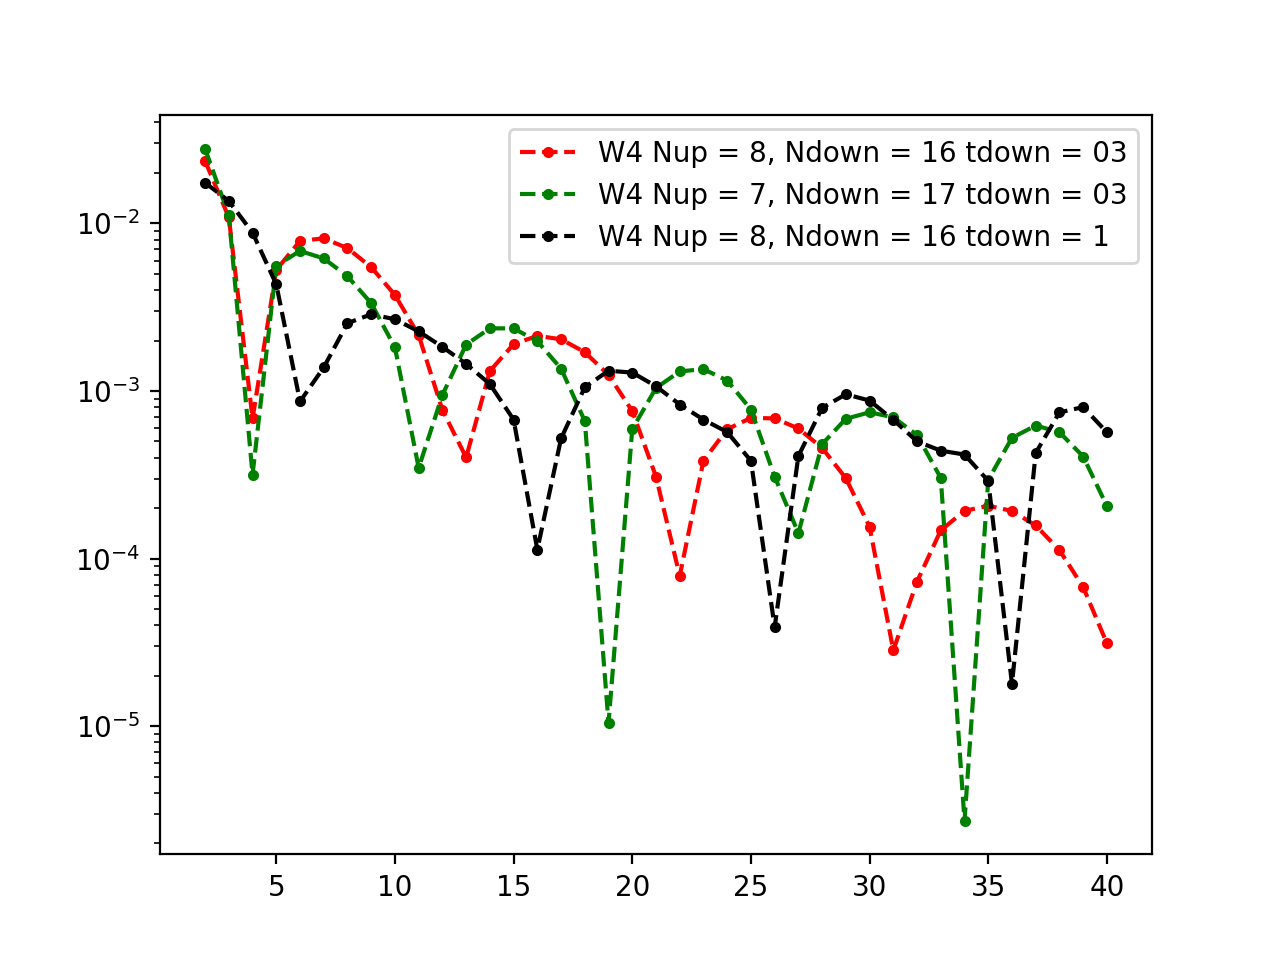

In [117]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W4 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W4 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W4 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
         
plt.legend()

**Outcome1: For relatively small nup/ndown densities it can be seen that for commensurate nup/ndown correlations decay faster than for incommensurate case (red line vs green line).**

**Outcome2: For relatively small nup/ndown densities it can be seen that for commensurate nup/ndown and tdown < tup correlations decay faster than for commensurate case and tdown = tup (red line vs black line).**



In [121]:
df_unequal = file_to_pd_2('W4_0.30000011_25_correlations.txt')
df_equal = file_to_pd_2('W4_0.30000012_24_correlations.txt')
df_equal_1 = file_to_pd_2('W4_1.00000012_24_correlations.txt')

In [122]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


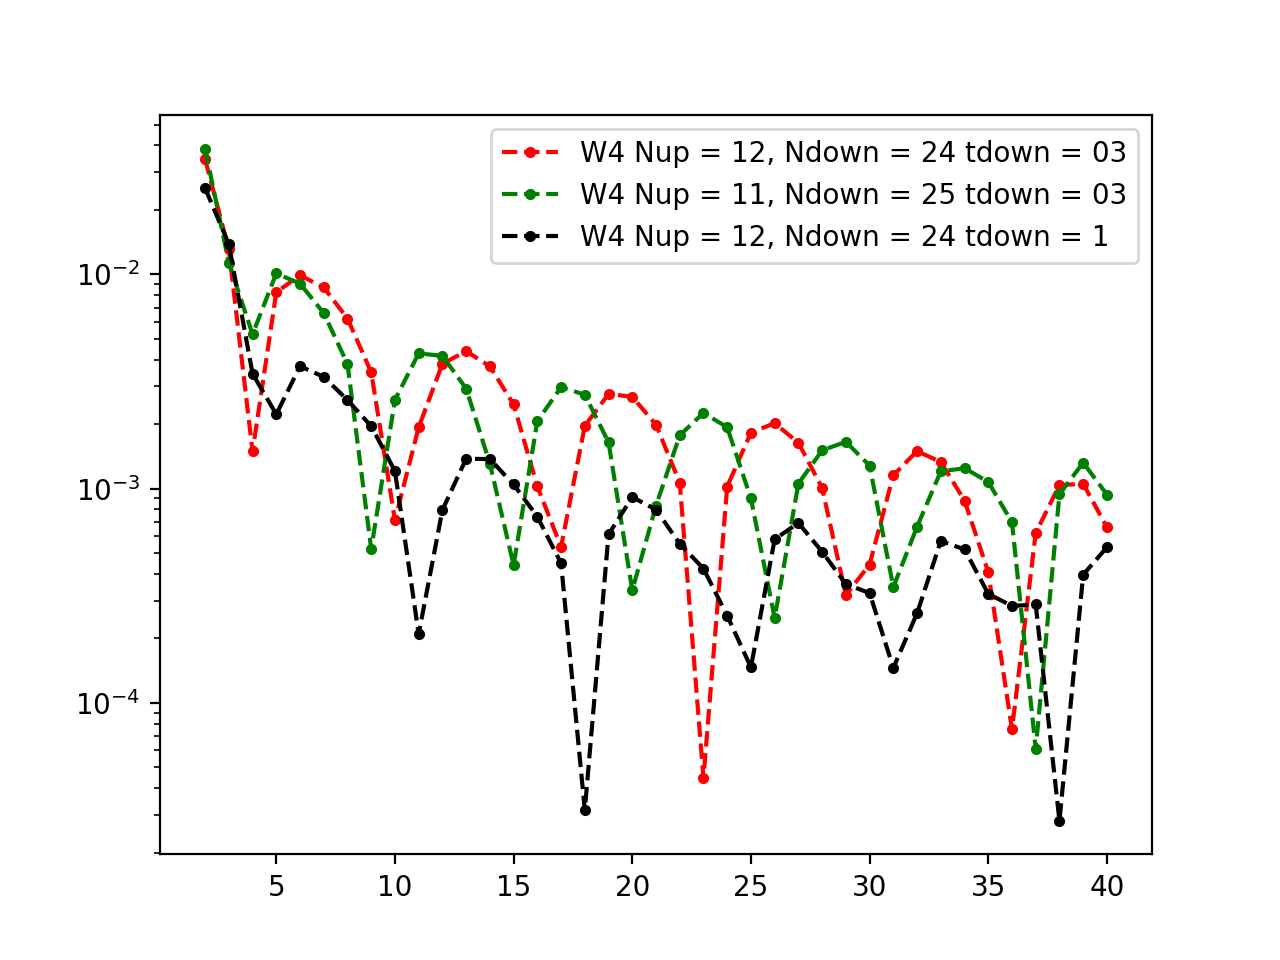

In [127]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W4 Nup = 12, Ndown = 24 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W4 Nup = 11, Ndown = 25 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W4 Nup = 12, Ndown = 24 tdown = 1', c = 'black')
         
plt.legend()

For larger nup/ndown densities my interpretations is as follows:

**Outcome3: for large W trimer energy becomes [negligible](https://github.com/mindelly/diagrams2/blob/master/Trimers/Trimers.ipynb) and there is almost no difference between commensurate and incommensurate cases (red and green lines almost coincide)**  



# W = 5, L = 80, tdown = 0.3 / tdown = 1

Correlations are measured along the central leg

In [132]:
df_unequal = file_to_pd_2('W5_0.3000007_17_correlations.txt')
df_equal = file_to_pd_2('W5_0.3000008_16_correlations.txt')
df_equal_1 = file_to_pd_2('W5_1.0000008_16_correlations.txt')

In [133]:
W, L = 5, 80
ctr = W * (L//2) - W//2

In [134]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


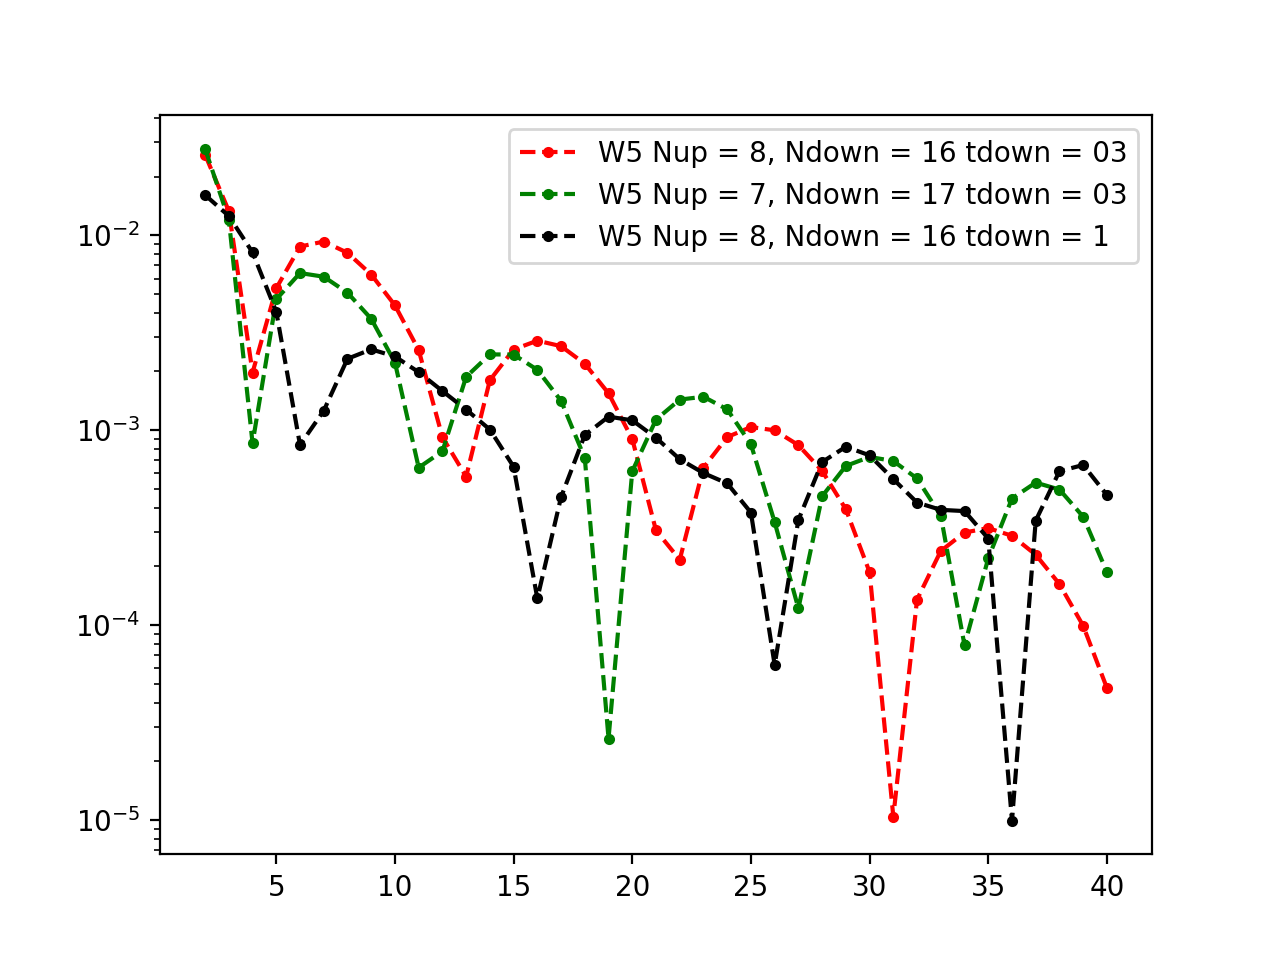

In [138]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W5 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W5 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W5 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
         
plt.legend()

**Outcome1: For relatively small nup/ndown densities it can be seen that for commensurate nup/ndown correlations decay faster than for incommensurate case (red line vs green line).**

**Outcome2: For relatively small nup/ndown densities it can be seen that for commensurate nup/ndown and tdown < tup correlations decay faster than for commensurate case and tdown = tup (red line vs black line).**



In [139]:
df_unequal = file_to_pd_2('W5_0.3000009_21_correlations.txt')
df_equal = file_to_pd_2('W5_0.30000010_20_correlations.txt')
df_equal_1 = file_to_pd_2('W5_1.00000010_20_correlations.txt')

In [140]:
cor_equal = get_all_correlations(df_equal, ctr)
cor_equal = [get(cor_equal, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor_unequal = get_all_correlations(df_unequal, ctr)
cor_unequal = [get(cor_unequal, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor_equal_1 = get_all_correlations(df_equal_1, ctr)
cor_equal_1 = [get(cor_equal_1, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


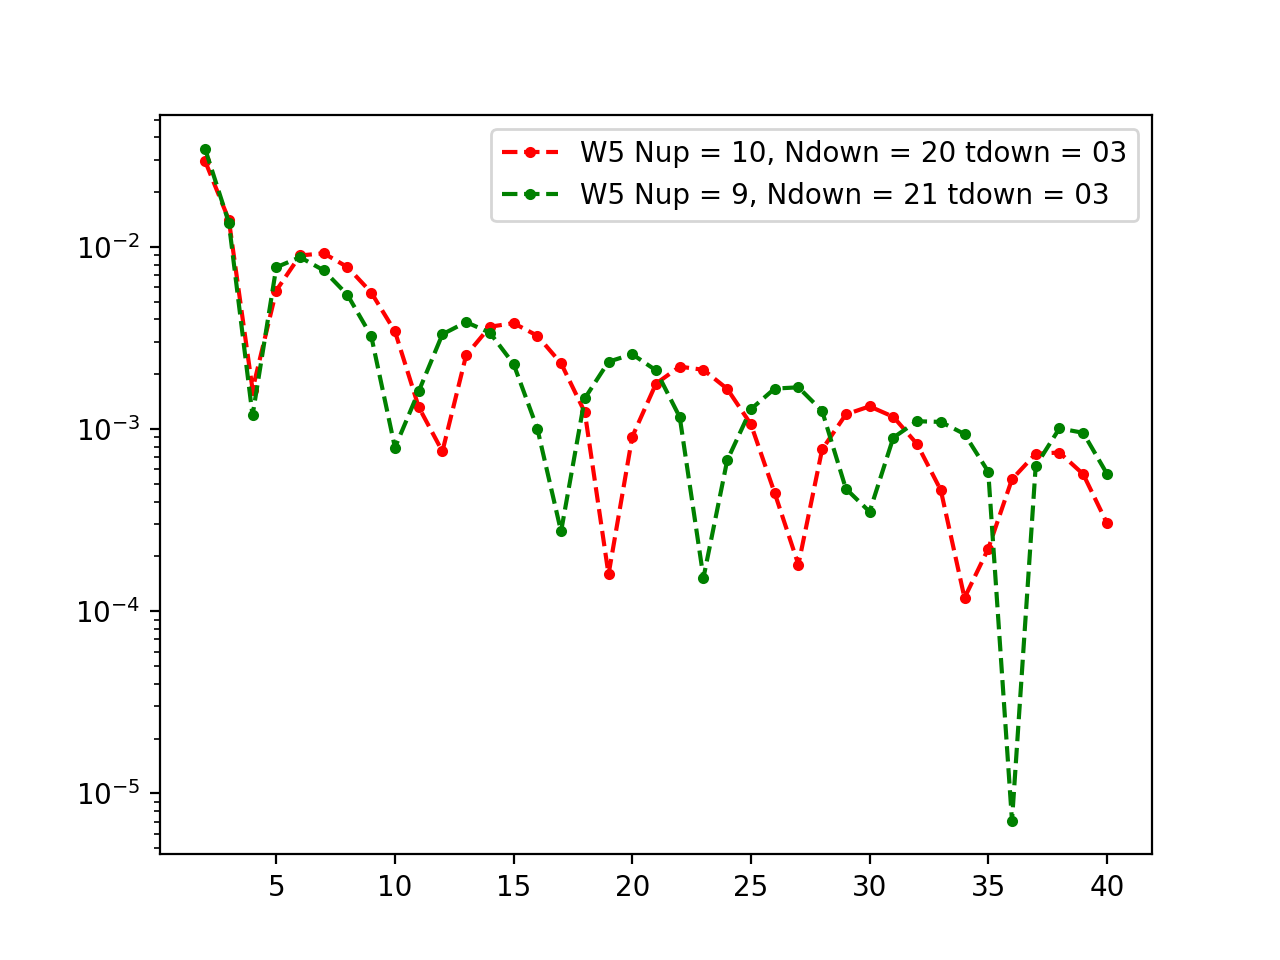

In [142]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W5 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
         np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
             label = 'W5 Nup = 9, Ndown = 21 tdown = 03', c = 'green')
# plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
#          np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
#              label ='W5 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
         
plt.legend()

**Outcome3: for larger W trimer energy becomes negligible and there is almost no difference between commensurate and incommensurate cases (red and green lines almost coincide)**  

<IPython.core.display.Javascript object>


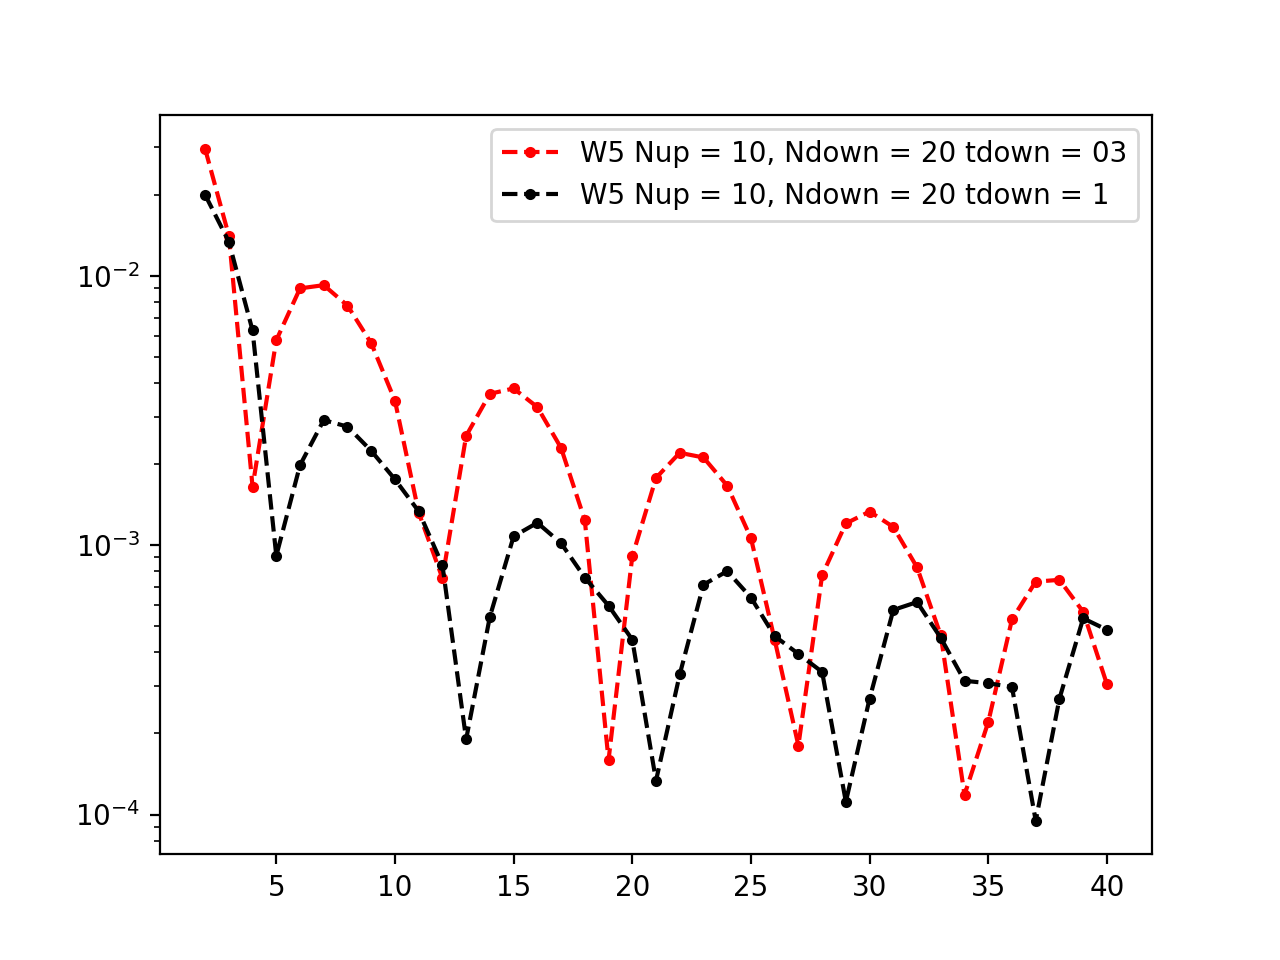

In [145]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(cor_equal))][1:],
         np.abs(np.array(cor_equal).ravel())[1:], '.--', 
             label ='W5 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
# plt.semilogy([i+1 for i in range(len(cor_unequal))][1:],
#          np.abs(np.array(cor_unequal).ravel())[1:], '.--', 
#              label = 'W5 Nup = 9, Ndown = 21 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(cor_equal_1))][1:],
         np.abs(np.array(cor_equal_1).ravel())[1:], '.--', 
             label ='W5 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
         
plt.legend()

**Outcome4: For larger W when trimer energy is [really small](https://github.com/mindelly/diagrams2/blob/master/Trimers/Trimers.ipynb) the decay order for red line is linear and for the black line in semilogy-scale it looks nonlinear, but i cannot conclude if it is exponential or polynomial**  